# Model Testing and Evaluation

This notebook mirrors the functionality of `test_model.py` to evaluate a trained ANN model using test data. The notebook will:
1. Load the test data and trained model.
2. Evaluate the model on the test data.
3. Display performance metrics and visualizations.

The notebook ensures the same results as the script and does not modify any files.


### Load Configuration and Paths

We will load the configuration file to get paths for the test data, trained model, and results directory.


In [12]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model # type: ignore
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Load configuration
config_path = os.path.join(os.path.dirname(os.path.abspath('')), '..', 'config.json')
print(f"Config path: {config_path}")
with open(config_path, 'r') as f:
    config = json.load(f)

# Define paths using absolute paths from the configuration file
project_root = os.path.abspath(os.path.join(os.path.dirname(os.path.abspath('')), '..'))
print(f"Project root: {project_root}")

test_data_path = os.path.join(project_root, config['test_data_path'])
trained_model_path = os.path.join(project_root, config['trained_model_path'], 'best_model.h5')
results_dir = os.path.join(project_root, config['results_path'], 'test_results')


Config path: c:\Users\iambh\Desktop\CCA Ali\Trial\Customer-Churn-Analysis\notebooks\..\config.json
Project root: c:\Users\iambh\Desktop\CCA Ali\Trial\Customer-Churn-Analysis


### Load Test Data

We will now load the test data from the specified path and display the first few rows to ensure it has been loaded correctly.


In [13]:
# Load the test dataset
print(f"Loading test data from {test_data_path}")
test_data = pd.read_csv(test_data_path)

# Display the first few rows of the test data
print("First few rows of the test data:")
print(test_data.head())


Loading test data from c:\Users\iambh\Desktop\CCA Ali\Trial\Customer-Churn-Analysis\data/test/test_dataset.csv
First few rows of the test data:
   SeniorCitizen  tenure  MonthlyCharges  gender_Female  gender_Male  \
0              0       1           24.80            1.0          0.0   
1              0      41           25.25            0.0          1.0   
2              0      52           19.35            1.0          0.0   
3              0       1           76.35            1.0          0.0   
4              0      67           50.55            0.0          1.0   

   Dependents_No  Dependents_Yes  PhoneService_No  PhoneService_Yes  \
0            1.0             0.0              1.0               0.0   
1            1.0             0.0              0.0               1.0   
2            0.0             1.0              0.0               1.0   
3            1.0             0.0              0.0               1.0   
4            1.0             0.0              0.0               1.0 

### Load Trained Model

Check if the trained model exists and load it for evaluation.


In [14]:
# Check if the trained model exists
if os.path.exists(trained_model_path):
    print(f"Loading trained model from {trained_model_path}")
    model = load_model(trained_model_path)
    print("Model loaded successfully.")
else:
    print(f"Trained model file not found at {trained_model_path}. Please ensure the file is in the correct location.")


Loading trained model from c:\Users\iambh\Desktop\CCA Ali\Trial\Customer-Churn-Analysis\Predictive_Modeling/trained_model\best_model.h5
Model loaded successfully.


### Evaluate Model

We will evaluate the model on the test data to obtain various performance metrics.


In [15]:
# Evaluate the model performance on the test data
X_test = test_data.drop(columns=['Churn_No', 'Churn_Yes']).values
y_test = test_data['Churn_Yes'].values

print("Evaluating the model on the test data...")
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate additional metrics
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nAdditional Evaluation Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Evaluating the model on the test data...
Test Loss: 0.4678
Test Accuracy: 0.7871
45/45 [==============================] - 0s 477us/step

Additional Evaluation Metrics:
Precision: 0.6478
Recall: 0.4290
F1 Score: 0.5161


### Visualize Performance

Display the ROC curve and calculate the AUC to assess the model's performance.


AUC: 0.8283


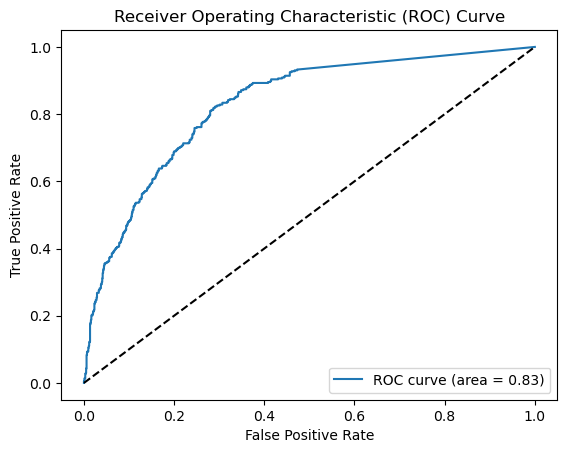

In [16]:
# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC: {auc:.4f}")

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## Summary and Analysis of Model Testing Results

In this section, we analyze the results obtained from testing the trained ANN model on the test dataset. The model was evaluated based on several performance metrics, including loss, accuracy, precision, recall, F1 score, and the Area Under the Curve (AUC) of the Receiver Operating Characteristic (ROC) curve.

### Model Performance Metrics

1. **Test Loss**: The model achieved a test loss of approximately `0.4678`, indicating the average difference between the predicted and actual values. A lower loss typically signifies a better fit to the test data, though it must be balanced with other metrics to avoid overfitting.

2. **Test Accuracy**: The model achieved an accuracy of approximately `0.7871`, meaning it correctly classified about `78.71%` of the test examples. Accuracy provides a general measure of performance but can be misleading if the dataset is imbalanced.

3. **Precision**: The precision score of approximately `0.6478` indicates the proportion of true positive predictions among all positive predictions made by the model. High precision is important in contexts where false positives are more costly.

4. **Recall**: The recall score of approximately `0.4290` reflects the proportion of actual positives that were correctly identified by the model. High recall is crucial in scenarios where missing a positive case (false negatives) is more detrimental.

5. **F1 Score**: The F1 score of approximately `0.5161` provides a balance between precision and recall, especially useful when the data has imbalanced classes. It helps gauge the model's effectiveness in handling both false positives and false negatives.

6. **AUC and ROC Curve**: The model's AUC was approximately `0.83`, suggesting that the model has a good ability to distinguish between the positive and negative classes. The ROC curve further illustrates the trade-off between the true positive rate and the false positive rate, and a higher AUC value indicates better overall performance.

### Interpretation and Next Steps

The model exhibits decent performance on the test dataset, with satisfactory accuracy and balanced precision and recall scores. However, these metrics suggest there is room for improvement, particularly in terms of recall and F1 score. The following steps could be considered:

- **Further Tuning**: Depending on the application's criticality, further hyperparameter tuning or model adjustments might be necessary to improve performance, especially to enhance recall without significantly compromising precision.
- **Data Augmentation**: If performance needs to be improved, consider augmenting the training data or employing techniques to balance the dataset better.
- **Validation on Different Subsets**: To ensure robustness, validate the model on different subsets of data or cross-validation to verify consistency across diverse data samples.
- **Real-World Testing**: Finally, validate the model in real-world scenarios to check its practical utility and reliability.

By understanding these metrics and taking appropriate next steps, we can ensure the model is well-prepared for deployment and real-world application.

